# lab7

1. Виконати вирішення задач регресії та класифікації для наборів даних, що використовувалися в лабораторних роботах 3 та 5 з використанням Tensorflow & NN.


Регресія

In [32]:
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt

data_train = pd.read_csv("../lab5/data/train.csv")
data_test = pd.read_csv("../lab5/data/test.csv")

data_train = data_train.dropna()

X_train = data_train[['x']]
y_train = data_train['y']


X_test = data_test[['x']]
y_test = data_test['y']


model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(1)
])

model.compile(optimizer='adam', loss='mean_squared_error')

model.fit(X_train, y_train, epochs=10, batch_size=10, validation_split=0.2)


Epoch 1/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 2043.1694 - val_loss: 28.4842
Epoch 2/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 12.2791 - val_loss: 8.1830
Epoch 3/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 8.1315 - val_loss: 8.0278
Epoch 4/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 6.9495 - val_loss: 7.9978
Epoch 5/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 7.8877 - val_loss: 8.3868
Epoch 6/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 7.6097 - val_loss: 8.1318
Epoch 7/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 8.5606 - val_loss: 8.0144
Epoch 8/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 7.7690 - val_loss: 8.1038
Epoch 9/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 7.9536 - val_loss: 8.0033
Epoch 10/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 7.6190 - val_loss: 8.0353


10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step


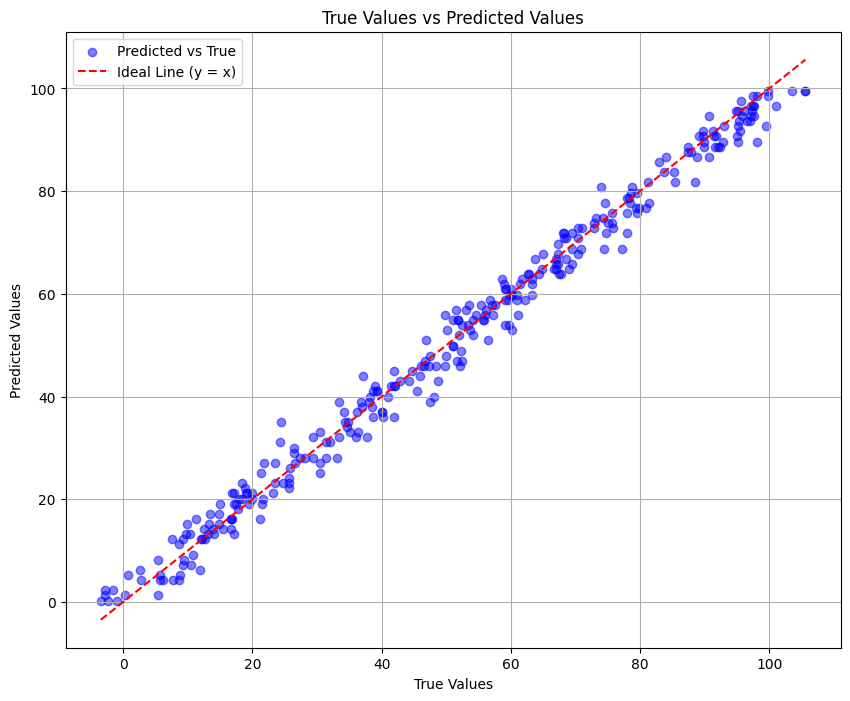

In [33]:
y_pred = model.predict(X_test)

# Побудова графіку
plt.figure(figsize=(10, 8))
plt.scatter(y_test, y_pred, alpha=0.5, color='blue', label='Predicted vs True')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', label='Ideal Line (y = x)')

# Підписи та налаштування
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.title('True Values vs Predicted Values')
plt.legend()
plt.grid(True)
plt.show()

Класифікація

In [26]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

data_train = pd.read_csv('data/train.csv')

y = data_train["price_range"]
X = data_train.drop("price_range", axis=1)


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=666)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(4, activation='softmax') 
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

model.fit(X_train, y_train, epochs=40, batch_size=10, validation_split=0.2)

Epoch 1/40
112/112 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.3442 - loss: 1.3457 - val_accuracy: 0.5250 - val_loss: 1.1177
Epoch 2/40
112/112 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6234 - loss: 0.9546 - val_accuracy: 0.7000 - val_loss: 0.7468
Epoch 3/40
112/112 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8130 - loss: 0.6086 - val_accuracy: 0.8107 - val_loss: 0.5414
Epoch 4/40
112/112 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8767 - loss: 0.4429 - val_accuracy: 0.8643 - val_loss: 0.4056
Epoch 5/40
112/112 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9048 - loss: 0.3340 - val_accuracy: 0.8929 - val_loss: 0.3347
Epoch 6/40
112/112 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9429 - loss: 0.2547 - val_accuracy: 0.9179 - val_loss: 0.2775
Epoch 7/40
112/112 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9561 - loss: 0.1921 - val_accuracy: 0.9143 - val_loss: 0.2505
Epoch 8/40
112/112 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9629 - loss: 0.1510 - val_accuracy: 0.

19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step


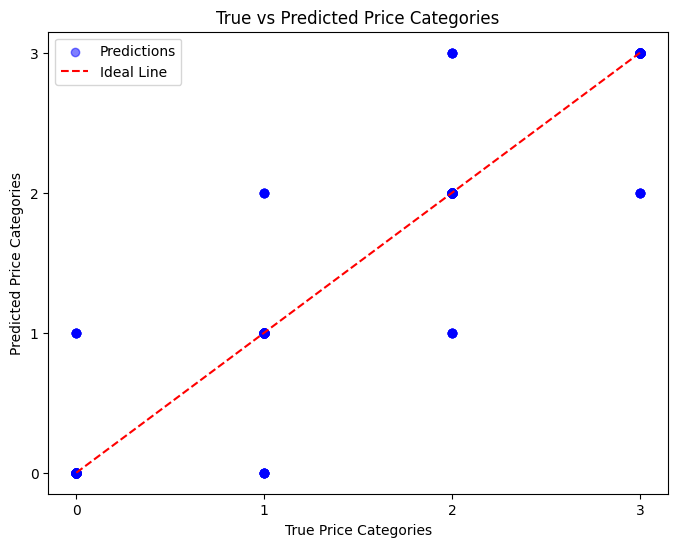

In [ ]:
import numpy as np

y_pred = np.argmax(model.predict(X_test), axis=1)

plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.5, color='blue', label='Predictions')
plt.plot([0, 3], [0, 3], color='red', linestyle='--', label='Ideal Line')  # Лінія y=x

plt.xlabel('True Price Categories')
plt.ylabel('Predicted Price Categories')
plt.title('True vs Predicted Price Categories')
plt.xticks([0, 1, 2, 3])
plt.yticks([0, 1, 2, 3])
plt.legend()
plt.show()